In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv('datasets/Ads_CTR_Optimisation.csv')

In [7]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [8]:
 # Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [13]:
total_reward

2125

In [18]:
pd.Series(ads_selected).value_counts(normalize=True)

4    0.5630
7    0.1106
0    0.0947
6    0.0435
1    0.0417
3    0.0380
8    0.0352
2    0.0338
9    0.0215
5    0.0180
dtype: float64

In [14]:
import matplotlib.pyplot as plt

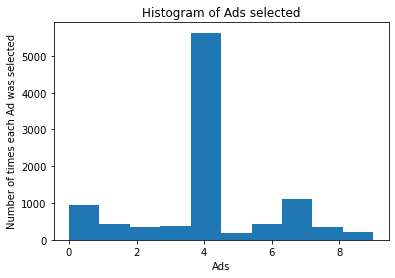

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()